In [2]:
import spacy
import nltk
from top2vec import Top2Vec
import os

In [4]:
data = {}
documents = []

for folder in os.listdir('data'):
    for file in os.listdir('data/' + folder):
        with open('data/' + folder + '/' + file, 'r', encoding="utf-8") as f:
            data[file] = f.read()

In [5]:
model = Top2Vec(documents=list(data.values()), speed="learn", workers=12, embedding_model='universal-sentence-encoder')

2022-10-30 11:36:48,589 - top2vec - INFO - Pre-processing documents for training
e:\Ebay_K\Top2Vec\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
2022-10-30 11:36:50,574 - top2vec - INFO - Downloading universal-sentence-encoder model
2022-10-30 11:36:57,245 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-10-30 11:36:59,731 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2022-10-30 11:37:05,872 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2022-10-30 11:37:05,877 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [6]:
reduced_vectors = model.topic_vectors_reduced

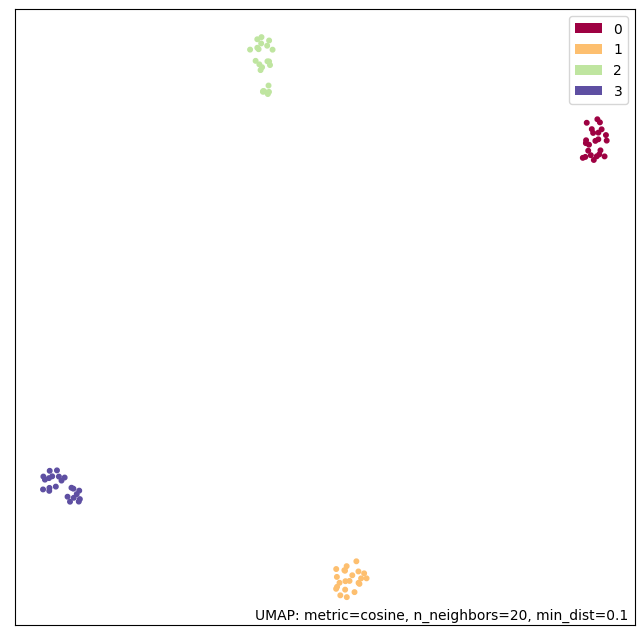

In [7]:
import umap.plot

umap_args_model = {
"n_neighbors": 20,
"n_components": 2,
"metric": "cosine",
'min_dist':0.10,
'spread':1
}
umap_model = umap.UMAP(**umap_args_model).fit(model.document_vectors)
umap_fig2 = umap.plot.points(umap_model, labels = model.doc_top)

In [8]:
model.topic_words

array([['margin', 'capex', 'bullish', 'invested', 'leveraging',
        'turnover', 'increasing', 'increases', 'improvements',
        'dividend', 'citigroup', 'incremental', 'leverage', 'quarterly',
        'increase', 'increased', 'cfo', 'earnings', 'profitability',
        'llc', 'dividends', 'lifo', 'revenues', 'accounting',
        'acquisitions', 'expanding', 'forward', 'progress',
        'improvement', 'shareholders', 'rollout', 'asset', 'segment',
        'metrics', 'significant', 'gaap', 'inventory', 'efficiencies',
        'momentum', 'closing', 'impact', 'spending', 'raise', 'measure',
        'revenue', 'largest', 'advance', 'larger', 'expansion',
        'materially'],
       ['bullish', 'leverage', 'growth', 'invested', 'capex',
        'leveraging', 'margin', 'forward', 'increasing', 'citigroup',
        'segment', 'expansion', 'expanding', 'increase', 'llc',
        'increases', 'pharma', 'dividend', 'quarterly', 'analysts',
        'earnings', 'uncertainties', 'analys

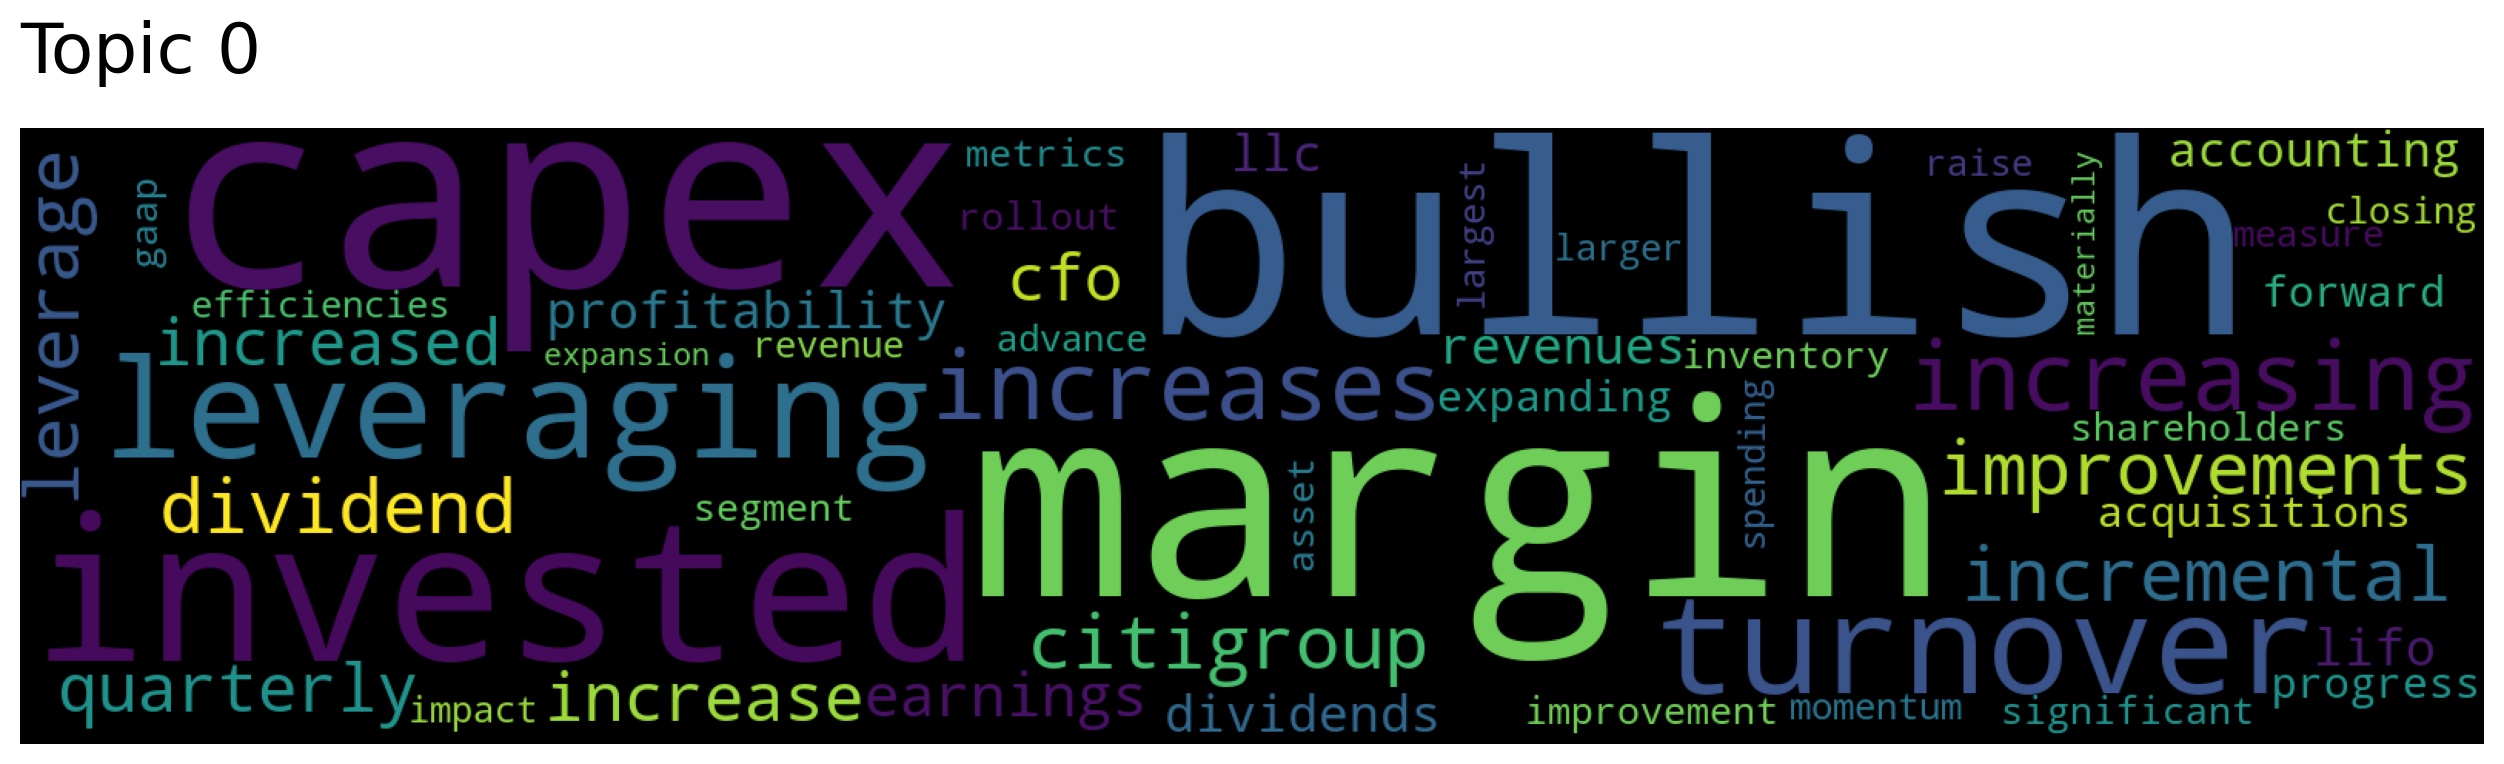

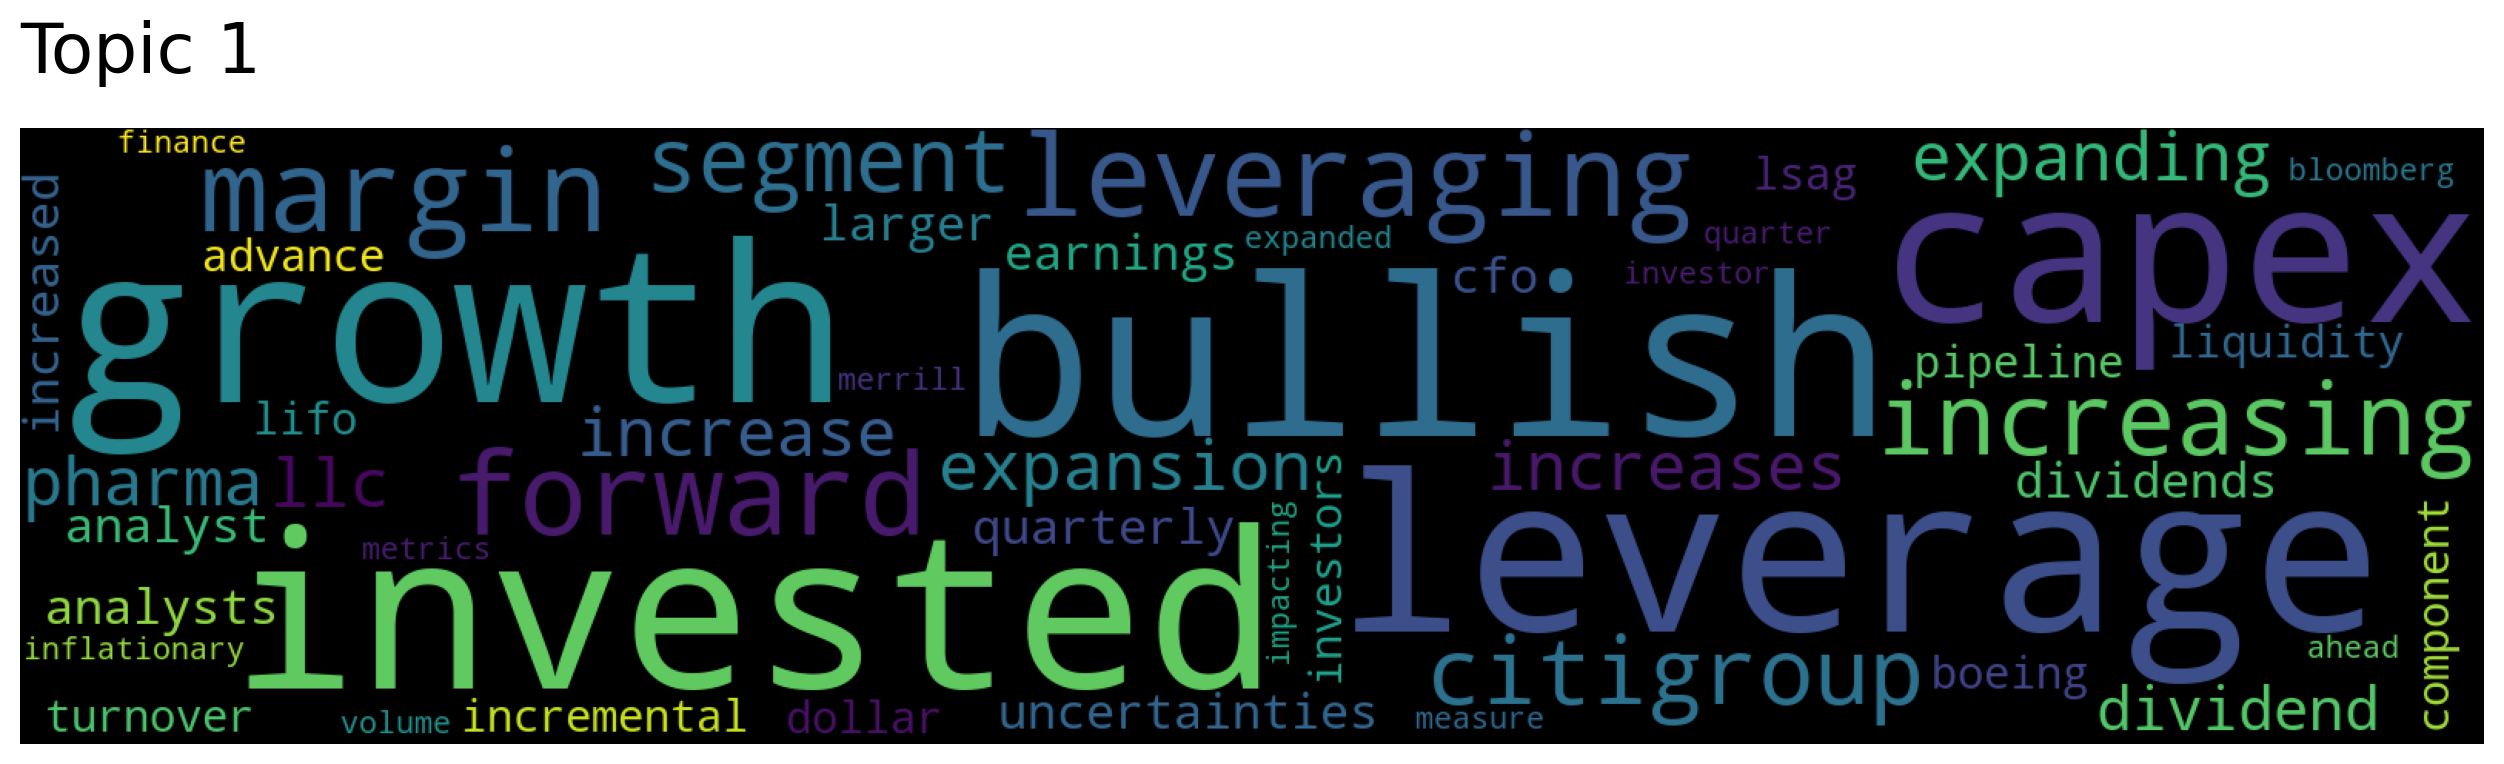

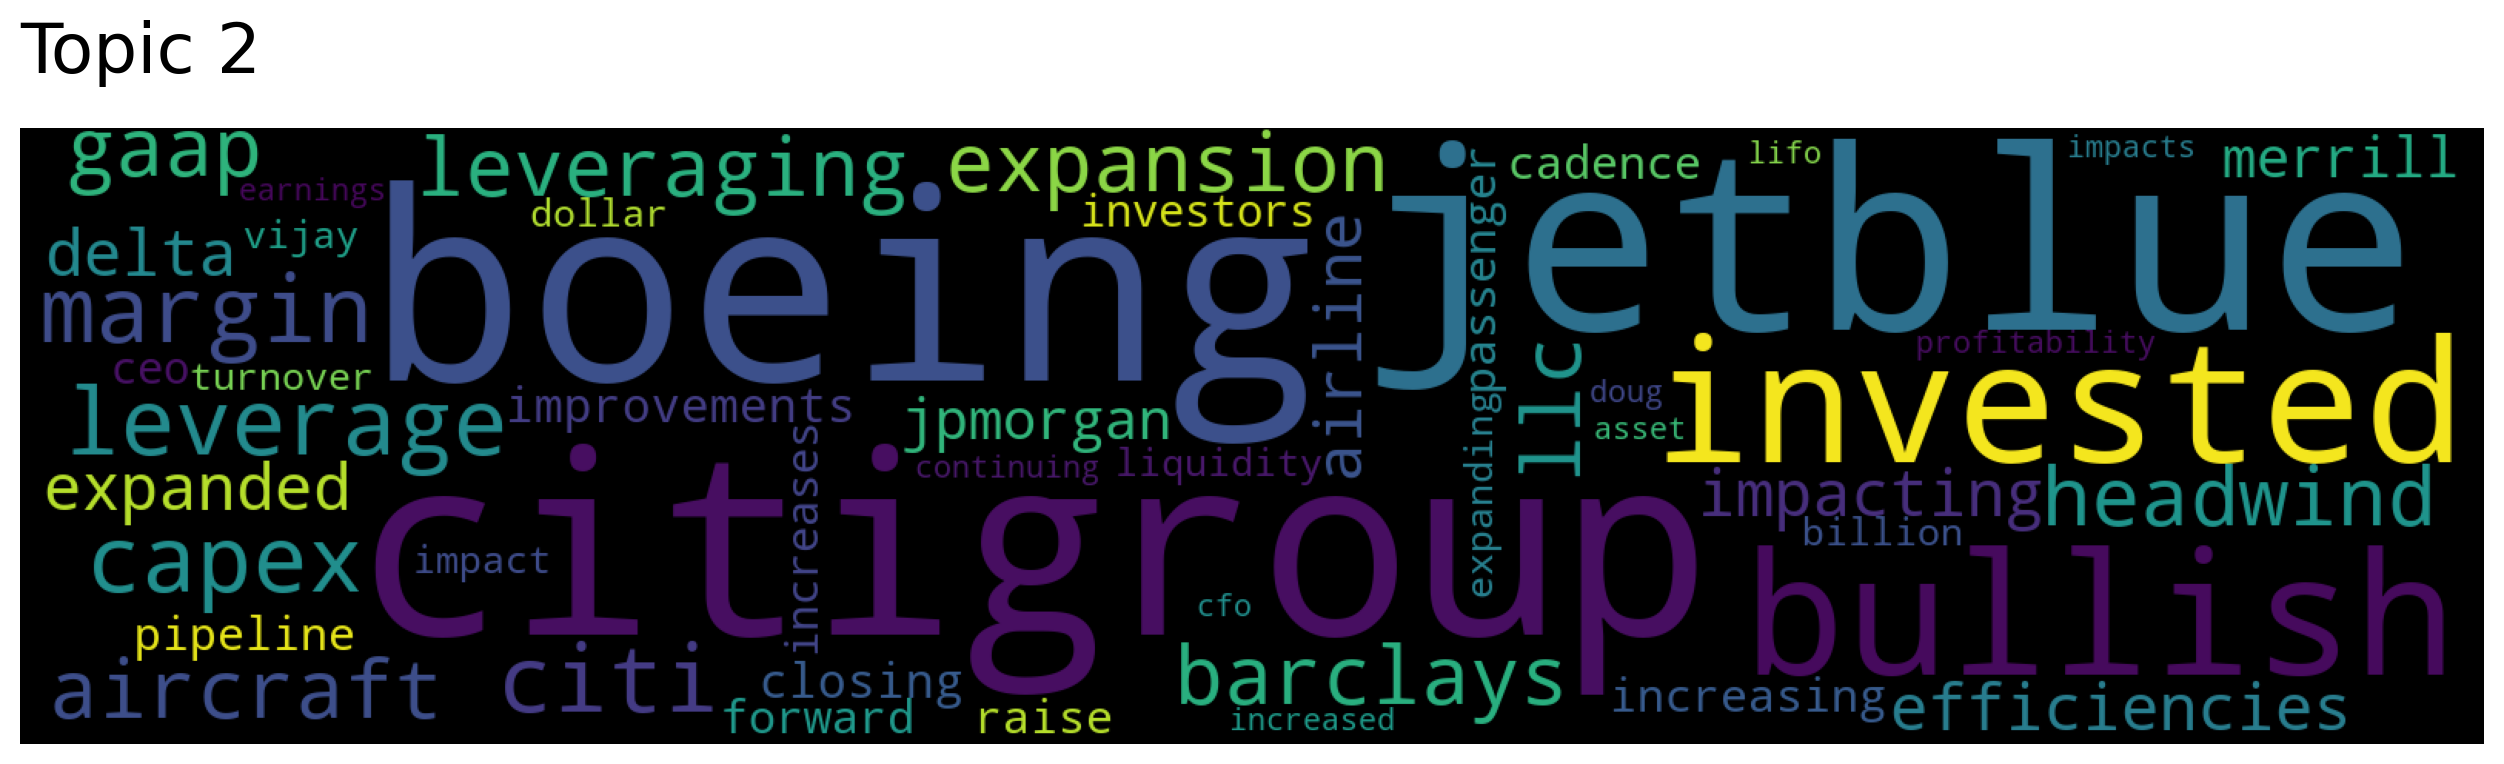

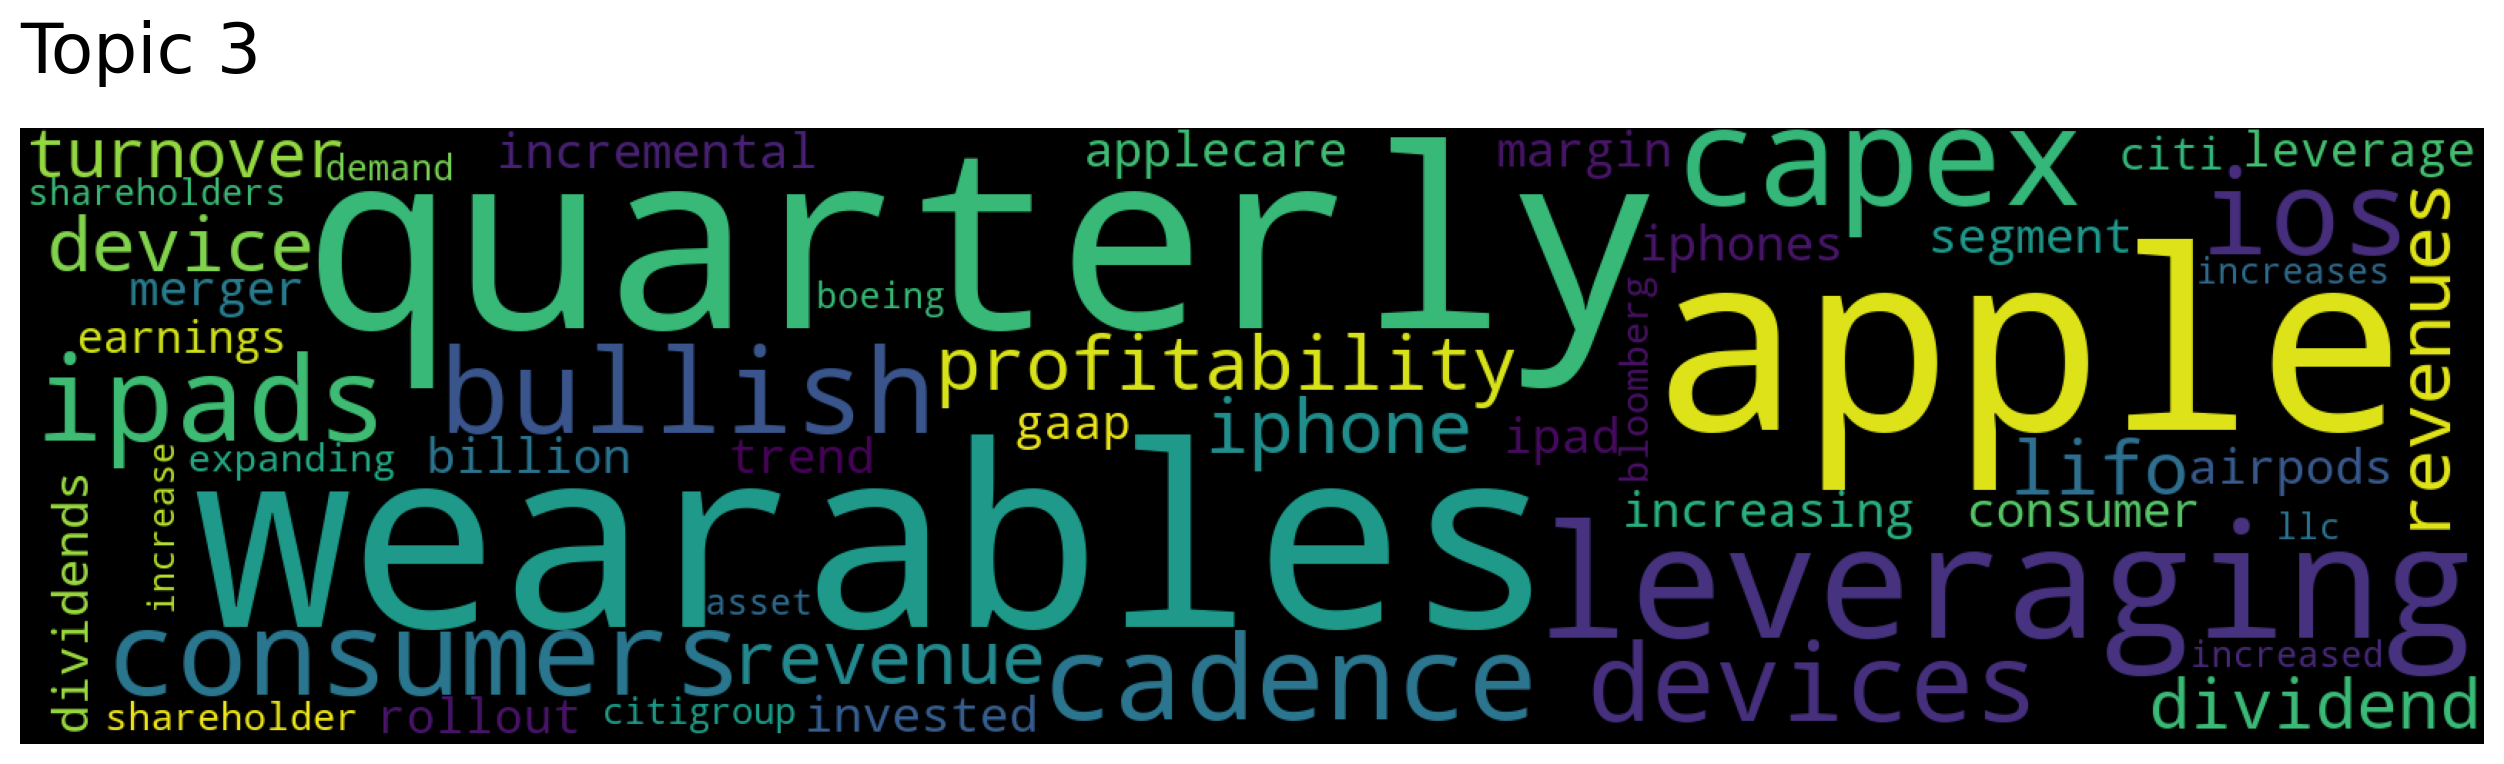

In [9]:
topic_words, word_scores, topic_nums = model.get_topics(4)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)